# IMPORT MODULES





PROGRAM STARTS ON 2022-03-17  AT 19:07:38.513205
SAMPLE ACQWs1 STRUCTURE:


|  <--300.00 nm-->   |  <--11.87 nm-->  |   <--1.98 nm-->    |  <--23.74 nm-->  |  <--300.00 nm-->   |
|--------------------+------------------+--------------------+------------------+--------------------|
|                    |                  |                    |                  |                    |
|                    |                  |                    |                  |                    |
| Al(0.15)Ga(0.85)As |       GaAs       | Al(0.15)Ga(0.85)As |       GaAs       | Al(0.15)Ga(0.85)As |
|                    |                  |                    |                  |                    |
|                    |                  |                    |                  |                    |
|                    |                  |                    |                  |                    |





light-hole energies    -: 100%|█████████████████████████████| 2500/2500 [00:00<00:00, 120785.60it/s]




No. Of Transition Energies (>0)?===>  2




|  TRANSITION  |   ENERGY [eV] |   WAVELENGTH |
|--------------+---------------+--------------|
|    E1-HH1    |        1.5149 |     818.1131 |
|    E1-LH1    |        1.5189 |     816.0012 |
|    E2-HH2    |        1.5310 |     809.5306 |
|    E2-LH2    |        1.5411 |     804.2427 |
 CPU TIME(s)	 : 36.64



Do you want export data? [Y/n] ===> n


Ok
CPU TIME(s) :	 39.13



Do you want plot the wave fuctions? [Y/n] ===>  y
Do you prefer absolute wave functions? [Y/n] ===>  y


Generating Wave Functions to plot      : 100%|██████████████████████| 2/2 [00:00<00:00, 1762.68it/s]


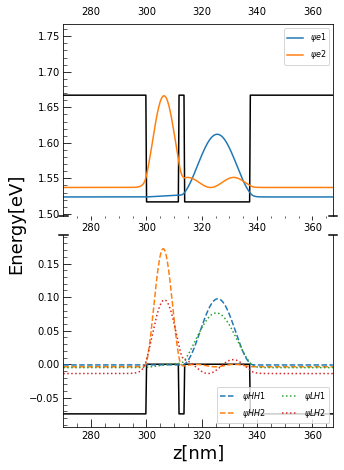

CPU TIME(s) :	 45.78


In [ ]:
#============== NUMBA AND NUMPY ==============
import sys
import os
import numpy as np
import numba
from numpy import linalg as LA
#============= MATPLOTLIB=====================
import matplotlib
import scipy.constants
#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.pylab as plt
#=============== Warnings =====================
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

#=============== BARS TQDM =====================
from tqdm import tqdm
from tabulate import tabulate


pathmoudules = 'E:\\OneDrive - Universidad Autonoma de San Luis Potosi - UASLP\\Documentos\\RUCO\\PYTHON-MODULES'
if pathmoudules not in sys.path:
    sys.path.append(pathmoudules)

    
    
import FD_Hamiltonian as FD


# DESIGN CQWs


## PARAMTERS

In [ ]:
#STRUCTURE PARAMTERS
NSAM = "M742"
nm   = 1.0e-9
b1   = 300*nm
qw1  = 11.87*nm
b2   = 1.98*nm
qw2  = 11.87*nm
b3   = 300*nm
L    = b1+qw1+b2+qw2+b3
N    = 2500# No. of points
xx   = 0.0
dx   = L/(N+1)
x    = np.linspace(0, L, N)
Vcb  = np.zeros(N,dtype = np.float32)
Vvb  = np.zeros(N,dtype = np.float32)

#CONSTANTS
e0          = scipy.constants.e
hbar        = scipy.constants.hbar
m0          = scipy.constants.electron_mass
meV         = 1e-3;
eV2J        = e0
J2eV        = 1./eV2J
Temperature = 30.0
EgGaAsLT    = 1.519
amplitude   = 10.0
#Energy binding
Eb = 10.0

#compositions
xb1         = 0.20
xb2         = 0.20
xb3         = 0.20
xcomp1 = xb1
xcomp2 = xb2
xcomp3 = xb3
#materials
mb1         = 'AlGaAs'
mqw1        = 'GaAs'
mb2         = 'AlGaAs'
mqw2        = 'GaAs'
mb3         = 'AlGaAs'

#SELECT 
if mb2   == 'AlGaAs':
    Qc   = 0.67
    Qv   = 0.33
elif mb2 == 'AlAs':
    Qc   = 0.70
    Qv   = 0.30
# Materials
if (len(mb1)==6) and (len(mb2) == 6) and (len(mb3)==6):
    b1m = []
    b2m = []
    b3m = []
    lmb1 = list(mb1)
    lmb2 = list(mb2)
    lmb3 = list(mb3)
    for  ii in range(len(mb1)):
        if ii == 1:
            b1m.append(lmb1[ii]+'(%.2f)'%xb1)
            b2m.append(lmb2[ii]+'(%.2f)'%xb2)
            b3m.append(lmb3[ii]+'(%.2f)'%xb3)
        elif ii == 3:
            b1m.append(lmb1[ii]+'(%.2f)'%float(1-xb1))
            b2m.append(lmb2[ii]+'(%.2f)'%float(1-xb2))
            b3m.append(lmb3[ii]+'(%.2f)'%float(1-xb3))
        else:
            b1m.append(lmb1[ii])
            b2m.append(lmb2[ii])
            b3m.append(lmb3[ii])
    b1m = ''.join(b1m)
    b2m = ''.join(b2m)
    b3m = ''.join(b3m)
elif (len(mb1)==6) and (len(mb2) != 6) and (len(mb3)==6):
    b1m = []
    b3m = []
    lmb1 = list(mb1)
    lmb3 = list(mb3)
    for  ii in range(len(mb1)):
        if ii == 1:
            b1m.append(lmb1[ii]+'(%.2f)'%xb1)
            b3m.append(lmb3[ii]+'(%.2f)'%xb3)
        elif ii == 3:
            b1m.append(lmb1[ii]+'(%.2f)'%float(1-xb1))
            b3m.append(lmb3[ii]+'(%.2f)'%float(1-xb3))
        else:
            b1m.append(lmb1[ii])
            b3m.append(lmb3[ii])
    b1m = ''.join(b1m)
    b2m = mb2
    b3m = ''.join(b3m)


else:
    b1m = mb1
    b2m = mb2
    b3m = mb3

# elements to tabulate
qw1m = mqw1
qw2m = mqw2
db1s  = '<--%.2f nm-->'%(b1/nm)
dqw1s = '<--%.2f nm-->'%(qw1/nm)
db2s  = '<--%.2f nm-->'%(b2/nm)
dqw2s = '<--%.2f nm-->'%(qw2/nm)
db3s  = '<--%.2f nm-->'%(b3/nm)


sp = ' '
cols = 100
print('SAMPLE %s STRUCTURE:\n\n'%NSAM)
print(tabulate([[sp,sp,sp,sp,sp],
                [sp,sp,sp,sp,sp],
                [b1m ,qw1m,b2m,qw2m, b3m ],
                [sp,sp,sp,sp,sp],
                [sp,sp,sp,sp,sp],
                [sp,sp,sp,sp,sp]],
                [db1s,dqw1s,db2s,dqw2s,db3s], tablefmt='orgtbl',stralign='center',))
print('\n\n')
dx

SAMPLE M742 STRUCTURE:


|  <--300.00 nm-->   |  <--11.87 nm-->  |   <--1.98 nm-->    |  <--11.87 nm-->  |  <--300.00 nm-->   |
|--------------------+------------------+--------------------+------------------+--------------------|
|                    |                  |                    |                  |                    |
|                    |                  |                    |                  |                    |
| Al(0.20)Ga(0.80)As |       GaAs       | Al(0.20)Ga(0.80)As |       GaAs       | Al(0.20)Ga(0.80)As |
|                    |                  |                    |                  |                    |
|                    |                  |                    |                  |                    |
|                    |                  |                    |                  |                    |





2.50187924830068e-10

# POTENTIAL STRUCTURE

In [ ]:
@numba.jit
def STRUCTURE(xx):
    if (mb1==mb2) and (mb1 == mb3):
        if(xb1 == xb2) and (xb1 == xb3):
            if   ( 0.0 < xx <= b1):
                return 1
            elif (  b1 <= xx  <= b1+qw1):
                return 0
            elif (b1+qw1 <= xx <= b1+qw1+b2):
                return 1
            elif (b1+qw1+b2 <= xx <= b1+qw1+b2+qw2):
                return 0
            elif (b1+qw1+b2+qw2 <= xx <= b1+qw1+b2+qw2+b3):
                return 1
            else:
                return 1
        elif(xb1 != xb2) and (xb1 == xb3):
            if   ( 0.0 < xx <= b1):
                return 1
            elif (  b1 <= xx  <= b1+qw1):
                return 0
            elif (b1+qw1 <= xx <= b1+qw1+b2):
                return 2
            elif (b1+qw1+b2 <= xx <= b1+qw1+b2+qw2):
                return 0
            elif (b1+qw1+b2+qw2 <= xx <= b1+qw1+b2+qw2+b3):
                return 1
            else:
                return 1
        elif(xb1 != xb2) and (xb1 != xb3):
            if   ( 0.0 < xx <= b1):
                return 1
            elif (  b1 <= xx  <= b1+qw1):
                return 0
            elif (b1+qw1 <= xx <= b1+qw1+b2):
                return 2
            elif (b1+qw1+b2 <= xx <= b1+qw1+b2+qw2):
                return 0
            elif (b1+qw1+b2+qw2 <= xx <= b1+qw1+b2+qw2+b3):
                return 3
            else:
                return 1
    elif (mb1!=mb2) and (mb1 == mb3):
        if   ( 0.0 < xx <= b1):
            return 1
        elif (  b1 <= xx  <= b1+qw1):
            return 0
        elif (b1+qw1 <= xx <= b1+qw1+b2):
            return 4
        elif (b1+qw1+b2 <= xx <= b1+qw1+b2+qw2):
            return 0
        elif (b1+qw1+b2+qw2 <= xx <= b1+qw1+b2+qw2+b3):
            if(xb1 == xb3):
                return 1
            else:
                return 3
        else:
            return 1



@numba.jit
def VCB(xx):
    T = Temperature
    EgGaAs          = (EgGaAsLT-(5.408e-4*T**2/(204+T)))*e0
    EgAlAs          = 3.13*e0
    EgAlGaAs1       = (EgGaAsLT+1.48*xcomp1)*e0
    EgAlGaAs2       = (EgGaAsLT+1.48*xcomp2)*e0
    EgAlGaAs3       = (EgGaAsLT+1.48*xcomp3)*e0
    DeltaEgAlGaAs1  = EgAlGaAs1 - EgGaAs
    DeltaEgAlGaAs2  = EgAlGaAs2 - EgGaAs
    DeltaEgAlGaAs3  = EgAlGaAs3 - EgGaAs
    DeltaEgAlAs     = EgAlAs-EgGaAs
    if   (STRUCTURE(xx)==1):
            return  EgGaAs + DeltaEgAlGaAs1*Qc
    elif (STRUCTURE(xx)==0):
            return  EgGaAs
    elif (STRUCTURE(xx)==2):
            return  EgGaAs + DeltaEgAlGaAs2*Qc
    elif (STRUCTURE(xx)==3):
            return  EgGaAs + DeltaEgAlGaAs3*Qc
    elif (STRUCTURE(xx)==4):
            return  EgGaAs + DeltaEgAlAs*Qc
    else:
        return  EgGaAs + DeltaEgAlGaAs1*Qc

@numba.jit
def VVB(xx):
    T = Temperature
    EgGaAs          = (EgGaAsLT-(5.408e-4*T**2/(204+T)))*e0
    EgAlAs          = 3.13*e0
    EgAlGaAs1       = (EgGaAsLT+1.48*xcomp1)*e0
    EgAlGaAs2       = (EgGaAsLT+1.48*xcomp2)*e0
    EgAlGaAs3       = (EgGaAsLT+1.48*xcomp3)*e0
    DeltaEgAlGaAs1  = EgAlGaAs1 - EgGaAs
    DeltaEgAlGaAs2  = EgAlGaAs2 - EgGaAs
    DeltaEgAlGaAs3  = EgAlGaAs3 - EgGaAs
    DeltaEgAlAs     = EgAlAs-EgGaAs
    if   (STRUCTURE(xx)==1):
            return  - DeltaEgAlGaAs1*Qv
    elif (STRUCTURE(xx)==0):
            return  0
    elif (STRUCTURE(xx)==2):
            return  - DeltaEgAlGaAs2*Qv
    elif (STRUCTURE(xx)==3):
            return  - DeltaEgAlGaAs3*Qv
    elif (STRUCTURE(xx)==4):
            return  - DeltaEgAlAs*Qv
    else:
        return  - DeltaEgAlGaAs1*Qv
# ===============================================================================================



# ============================== QUANTUM WELLS POTENTIAL ===================================
for i in tqdm(range(N), desc = 'potential  profile'):
    xx = xx + dx
    Vcb[i] =  J2eV*VCB(xx)
    Vvb[i] =  J2eV*VVB(xx)
# ===============================================================================================


potential  profile: 100%|██████████| 2500/2500 [00:01<00:00, 2034.76it/s]


## EFFECTIVE MASS

In [ ]:
# Electron Effective Mass
@numba.jit
def effmee(point):
    mAlGaAs1  = (0.067+0.083*xcomp1)*m0
    mAlGaAs2  = (0.067+0.083*xcomp2)*m0
    mAlGaAs3  = (0.067+0.083*xcomp3)*m0
    mGaAs    = 0.067*m0
    mAlAs    = 0.15*m0
    if    (STRUCTURE(point) == 1):
            return mAlGaAs1
    elif  (STRUCTURE(point) == 2):
            return mAlGaAs2
    elif  (STRUCTURE(point) == 0):
            return mGaAs
    elif  (STRUCTURE(point) == 3):
            return mAlGaAs3
    elif  (STRUCTURE(point) == 4):
            return mAlAs
    else:
            return mAlGaAs1

# HEAVY HOLE Effective Mass
@numba.jit
def effmhh(point):
    mhhAlGaAs1  = (0.51 + 0.20*xcomp1)*m0
    mhhAlGaAs2  = (0.51 + 0.20*xcomp2)*m0
    mhhAlGaAs3  = (0.51 + 0.20*xcomp3)*m0
    mhhGaAs    = 0.51*m0
    mhhAlAs    = 0.71*m0
    if    (STRUCTURE(point) == 1):
            return mhhAlGaAs1
    elif  (STRUCTURE(point) == 2):
            return mhhAlGaAs2
    elif  (STRUCTURE(point) == 0):
            return mhhGaAs
    elif  (STRUCTURE(point) == 3):
            return mhhAlGaAs3
    elif  (STRUCTURE(point) == 4):
            return mhhAlAs
    else:
            return  mhhAlGaAs1

@numba.jit
def effmlh(point):
    mlhAlGaAs1  = (0.082 + 0.078*xcomp1)*m0
    mlhAlGaAs2  = (0.082 + 0.078*xcomp2)*m0
    mlhAlGaAs3  = (0.082 + 0.078*xcomp3)*m0
    mlhGaAs    = 0.082*m0
    mlhAlAs    = 0.16*m0
    if    (STRUCTURE(point) == 1):
            return mlhAlGaAs1
    elif  (STRUCTURE(point) == 2):
            return mlhAlGaAs2
    elif  (STRUCTURE(point) == 0):
            return mlhGaAs
    elif  (STRUCTURE(point) == 3):
            return mlhAlGaAs3
    elif  (STRUCTURE(point) == 4):
            return mlhAlAs
    else:
            return  mlhAlGaAs1
# ===============================================================================================



# FD METHOD

In [ ]:
HEl = FD.HEE(N,dx,VCB,effmee)
Ee  = np.zeros(N,dtype = np.float32)
for m in tqdm(range(0,N), desc = 'EE-ENERGY     '):
    Ee[m] = J2eV*HEl[0][m]

HHH = FD.HHL(N,dx,VVB,effmhh)    
Ehh = np.zeros(N,dtype = np.float32)
for m in tqdm(range(0,N), desc = 'HH-ENERGY     '):
    Ehh[m] = J2eV*HHH[0][m]

HLH = FD.HHL(N,dx,VVB,effmlh)
Elh = np.zeros(N,dtype = np.float32)
for m in tqdm(range(0,N),desc = 'LH-ENERGY     '):
    Elh[m] = J2eV*HLH[0][m]
    


ens = input('\n\nNo. Of Transition Energies (>0)?===> ')

if int(ens) == 0:
    print('Error you select 0')
    sys.exit(0)


#if (ks == 'yes'):
HHE   = np.zeros(int(ens),dtype = np.float32)
LHE   = np.zeros(int(ens),dtype = np.float32)
PSIe  = np.zeros((int(ens),N),dtype = np.float32)
PSIhh = np.zeros((int(ens),N),dtype = np.float32)
PSIlh = np.zeros((int(ens),N),dtype = np.float32)

for k in range(1,int(ens)+1):
    HHE[k-1]     = Ee[k]+Ehh[k]-Eb*meV
    LHE[k-1]     = Ee[k]+Elh[k]-Eb*meV


eprint = np.zeros((2*int(ens),3),dtype = object)
thelist = list(range(0, 2*int(ens)))
cc1 = 0
for ii in thelist[::2]:
    eprint[ii,:] = [str('E'+str(cc1+1)+'-'+'HH'+str(cc1+1)),'%.4f'% HHE[cc1] ,'%.4f'%(1239.4/ HHE[cc1])]
    cc1 = cc1+1

cc1 = 0
for ii in thelist[1::2]:
    eprint[ii,:] = [str('E'+str(cc1+1)+'-'+'LH'+str(cc1+1)),'%.4f'%LHE[cc1] ,'%.4f'%(1239.4/LHE[cc1])]
    cc1 = cc1+1


# PRINT TRANSISITIONS
print('\n')
print(tabulate(eprint,['TRANSITION','ENERGY [eV]','WAVELENGTH'], tablefmt='orgtbl',stralign='center',floatfmt='.4f'))

# ENERGIES VECTOR
eprinte = np.zeros((int(ens),3),dtype = object)
for ii in range(int(ens)):
    eprinte[ii,:] = [str('E'+str(ii+1)+'-> '+'%.4f'%Ee[ii+1]),
                     str('HH'+str(ii+1)+'->'+'%.4f'%-Ehh[ii+1]),
                     str('LH'+str(ii+1)+'->'+'%.4f'%-Elh[ii+1])]

    
eprint = np.zeros((2*int(ens),3),dtype = object)
thelist = list(range(0, 2*int(ens)))
cc1 = 0
for ii in thelist[::2]:
    eprint[ii,:] = [str('E'+str(cc1+1)+'-'+'HH'+str(cc1+1)),'%.4f'% HHE[cc1] ,'%.4f'%(1239.4/ HHE[cc1])]
    cc1 = cc1+1

cc1 = 0
for ii in thelist[1::2]:
    eprint[ii,:] = [str('E'+str(cc1+1)+'-'+'LH'+str(cc1+1)),'%.4f'%LHE[cc1] ,'%.4f'%(1239.4/LHE[cc1])]
    cc1 = cc1+1
print('\n\n')    
print(tabulate(eprinte,['ELECTRON [eV]','HEAVY HOLE [eV]','LIGHT HOLE  [eV]'],tablefmt='orgtbl',stralign='center',floatfmt='.4f'))

AttributeError: module 'cqws' has no attribute 'HEE'

# PLOT WAVFUNCTIONS

Generating Wave Functions to plot      : 100%|████████████████████████████████| 3/3 [00:00<?, ?it/s]


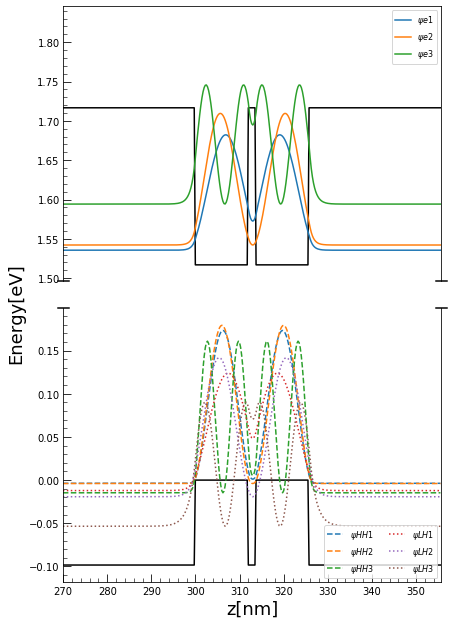

In [6]:
xmindata =  int((b1 -30*nm)/dx)
xmaxdata =  int((b1+qw1+b2+qw2 +30*nm)/dx)
ran      = xmaxdata-xmindata
PSIe  = np.zeros((int(ens),ran),dtype = np.float32)
PSIhh = np.zeros((int(ens),ran),dtype = np.float32)
PSIlh = np.zeros((int(ens),ran),dtype = np.float32)

aplot = 'Y'
if (aplot == 'y') or (aplot == 'Y'):
    for k in tqdm(range(1,int(ens)+1), desc = 'exp.wave   functions   -', ascii = False,ncols = cols):
        PSIe[k-1,:]  = amplitude*abs(eigvec_e[xmindata:xmaxdata,k])**2+Ee[k]
        PSIhh[k-1,:] = amplitude*abs(eigvec_hh[xmindata:xmaxdata,k])**2-Ehh[k]
        PSIlh[k-1,:] = amplitude*abs(eigvec_lh[xmindata:xmaxdata,k])**2-Elh[k]
else:
    for k in tqdm(range(1,int(ens)+1),desc = 'exp.wave   functions   -', ascii = False,ncols = cols):
        PSIe[k-1,:]  = amplitude*eigvec_e[xmindata:xmaxdata,k]+Ee[k]
        PSIhh[k-1,:] = amplitude*eigvec_hh[xmindata:xmaxdata,k]-Ehh[k]
        PSIlh[k-1,:] = amplitude*eigvec_lh[xmindata:xmaxdata,k]-Elh[k]


if (aplot == 'y') or (aplot == 'Y'):
    if (aplot == 'y') or (aplot == 'Y'):
        for k in tqdm(range(1,int(ens)+1),desc = 'Generating Wave Functions to plot      ',ascii = False,ncols = cols):
            PSIe[k-1,:]  = amplitude*abs(eigvec_e[xmindata:xmaxdata,k])**2+Ee[k]
            PSIhh[k-1,:] = amplitude*abs(eigvec_hh[xmindata:xmaxdata,k])**2-Ehh[k]
            PSIlh[k-1,:] = amplitude*abs(eigvec_lh[xmindata:xmaxdata,k])**2-Elh[k]
        if (max(Vcb) < max(PSIe[int(ens)-1,:])):
            ymaxe  = max(PSIe[int(ens)-1,:])+0.1
        else: 
            ymaxe  = max(Vcb) + 0.1
            
        xmin = b1/nm-30
        xmax = (b1+qw1+b2+qw2)/nm+30
        ymine =  min(Vcb[:])-0.02
        yminh =  min(Vvb[:])-0.02
        ymaxh  = max(PSIhh[1,:])+0.02
    else:
        for k in tqdm(range(1,int(ens)+1),desc = 'Generating Wave Functions to plot      ',ascii = False,ncols = cols):
            PSIe[k-1,:]  = amplitude*eigvec_e[xmindata:xmaxdata,k]+Ee[k]
            PSIhh[k-1,:] = amplitude*eigvec_hh[xmindata:xmaxdata,k]-Ehh[k]
            PSIlh[k-1,:] = amplitude*eigvec_lh[xmindata:xmaxdata,k]-Elh[k]
        if (max(Vcb) < max(PSIe[int(ens)-1,:])):
            ymaxe  = max(PSIe[int(ens)-1,:])+0.02
        else: 
            ymaxe  = max(Vcb) + 0.05
        xmin = b1/nm-30
        xmax = (b1+qw1+b2+qw2)/nm+30
        ymaxe  = max(PSIe[int(ens)-1,:])+0.02
        ymine =  min(PSIe[0,:])-0.02
        yminh =  min(PSIlh[int(ens)-1,:])-0.02
        ymaxh  = max(PSIhh[1,:])+0.02
    # POTENTIAL PROFILES
    fig, (ax,ax2) = plt.subplots(2, 1,figsize=(7,10), sharex=True)
    plt.subplots_adjust(left=0.15, right=0.9, bottom = 0.1,top=0.9,hspace=0.1)
    # hide the spines between ax and ax2
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.tick_params(labeltop='off')  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()
    #================================== Electron =======================================
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymine,ymaxe)
    ax.tick_params(bottom="off", labelbottom='off')
    ax.spines['bottom'].set_visible(False)
    ax.plot(x*1e9,Vcb,'-k')
    for p in range(int(ens)):
        ax.plot(x[xmindata:xmaxdata]/nm,PSIe[p,:],'-',label='$\psi e$'+str(int(p+1)))
    legend = ax.legend(loc='upper right',prop={'size': 8},ncol=1)
    ax.minorticks_on()
    ##ax2.tick_params(axis='y', which='minor', right='off')
    ax.tick_params(axis='x', which='minor', bottom='off')
    ax.tick_params(axis='y', length=4,which='minor', direction='in')
    ax.tick_params(axis='y', length=8,which='major', direction='in')
    #=============================== Heavy and light holes ==============================
    ax2.set_xlim(xmin,xmax)
    ax2.set_ylim(yminh,ymaxh)
    ax2.plot(x/nm,Vvb,'-k')
    for p in range(int(ens)):
        ax2.plot(x[xmindata:xmaxdata]/nm,PSIhh[p,:],'--',label='$\psi HH$'+str(int(p+1)))
    for p in range(int(ens)):
        ax2.plot(x[xmindata:xmaxdata]/nm,PSIlh[p,:],':',label='$\psi LH$'+str(int(p+1)))
    legend = ax2.legend(loc='lower right',prop={'size': 8},ncol=2)
    ax2.minorticks_on()
    ax2.set_xlabel(r'z[nm]', fontsize=18)
    ax2.set_ylabel(r'Energy[eV]',x=-0.1,y=0.8, ha='left', fontsize=18)
    ax2.tick_params(axis='x', length=4,which='minor', direction='in')
    ax2.tick_params(axis='x', length=8,which='major', direction='in')
    ax2.tick_params(axis='y', length=4,which='minor', direction='in')
    ax2.tick_params(axis='y', length=8,which='major', direction='in')
    # # draw skiwers
    d  = .015  # how big to make the diagonal lines in axes coordinates
    # arguments to pass to plot, just so we don't keep repeating them
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (0, 0), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (0, 0), **kwargs)  # top-right diagonal
    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - 0, 1 + 0), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - 0, 1 + 0), **kwargs)  # bottom-right diagonal
    plt.show()
    
    
    